In [1]:
import mysql.connector
import my_secrets as cred
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Functional Requirement 3: Data Analysis & Visualization

# function that pulls data from mysql via mysql.connector into pandas dataframe
def df_from_sql_query(query, db, credentials):
    # connect to database
    connection = mysql.connector.connect(database=db, user=credentials.mysql_username, password=credentials.mysql_password)
    cursor=connection.cursor()

    # excute query, fetch queried table and save into a pandas dataframe
    cursor.execute(query)
    records = cursor.fetchall()
    df = pd.DataFrame(records, columns=cursor.column_names)

    # close connection
    cursor.close()
    connection.close()

    return df

,TRANSACTION_ID,TRANSACTION_TYPE
0,1,Education
1,2,Entertainment
2,3,Grocery
3,4,Entertainment
4,5,Gas


TRANSACTION_TYPE
Bills            6861
Healthcare       6723
Test             6683
Education        6638
Entertainment    6635
Gas              6605
Grocery          6549
Name: count, dtype: int64

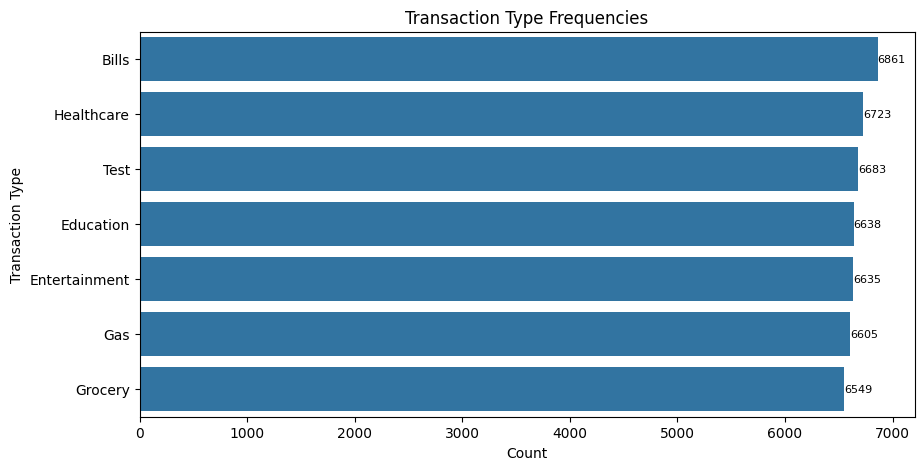

In [2]:
# 3.1 calc and plot which transaction type has highest transaction count

# pull relevant table or columns from mysql (id, type)
cc_transactions_df = df_from_sql_query("SELECT TRANSACTION_ID, TRANSACTION_TYPE FROM cdw_sapp_credit_card;", 'creditcard_capstone', cred)
display(cc_transactions_df.head())

# transaction type counts
tt_count = cc_transactions_df['TRANSACTION_TYPE'].value_counts().sort_values(ascending=False)
display(tt_count)

# plot
plt.figure(figsize=(10,5))
ax = sns.barplot(tt_count, orient='h')
ax.bar_label(ax.containers[0], fontsize=8)
ax.set(ylabel="Transaction Type", xlabel="Count", title="Transaction Type Frequencies")
plt.show()

,SSN,CUST_STATE
0,123451007,PA
1,123451012,CA
2,123451037,GA
3,123451041,NC
4,123451068,TX


CUST_STATE
NY    96
GA    73
PA    72
FL    64
IL    58
NJ    53
MD    50
CA    45
OH    44
MI    44
Name: count, dtype: int64

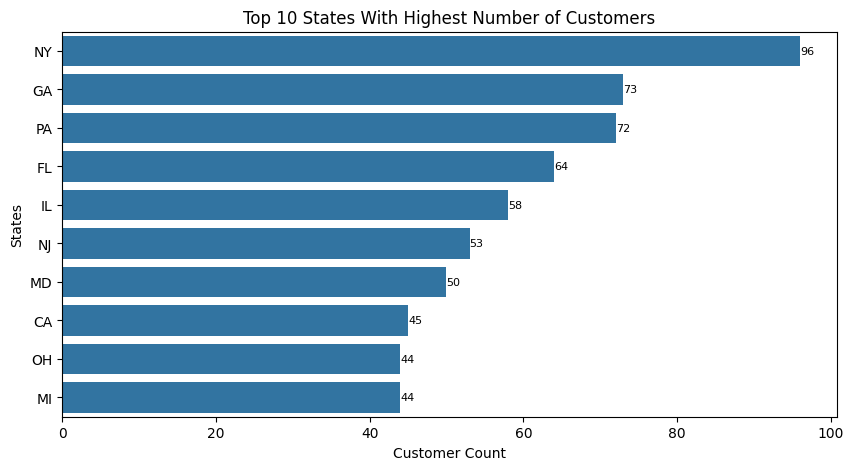

In [3]:
# 3.2 calc and plot top 10 states with highest number of customers

# pull relevant table or columns from mysql (ssn, state)
cust_state_df = df_from_sql_query("SELECT SSN, CUST_STATE FROM cdw_sapp_customer;", 'creditcard_capstone', cred)
display(cust_state_df.head())

# number of customers per state
state_cust_counts = cust_state_df['CUST_STATE'].value_counts().sort_values(ascending=False)
display(state_cust_counts.head(10))

# plot
plt.figure(figsize=(10,5))
ax = sns.barplot(state_cust_counts.head(10), orient='h')
ax.bar_label(ax.containers[0], fontsize=8)
ax.set(ylabel="States", xlabel="Customer Count", title="Top 10 States With Highest Number of Customers")
plt.show()

,SSN,FULL_NAME,TRANSACTION_ID,TRANSACTION_VALUE
0,123451007,Marcel andreas Camp,46659,47.92
1,123451007,Marcel andreas Camp,46660,29.01
2,123451007,Marcel andreas Camp,46661,5.59
3,123451007,Marcel andreas Camp,46662,33.78
4,123451007,Marcel andreas Camp,46663,51.18


,SSN,FULL_NAME,count,total_transaction_value
14,123451125,Ty leticia Daly,96,5633.07
177,123452783,Jessie selma Boucher,97,5548.14
248,123453486,Phoebe ali Martin,95,5476.08
814,123458668,Thurman granville Vera,99,5314.97
599,123456678,Bret margarita Perkins,99,5261.03
99,123452026,Joesph eula Mcclain,98,5241.18
152,123452518,Aurelia pearlie Haas,91,5223.96
414,123454933,Marcelo gonzalo Emerson,96,5203.08
693,123457547,Alexis lorene Villarreal,91,5149.75
102,123452085,Christina lyle Snow,94,5133.29


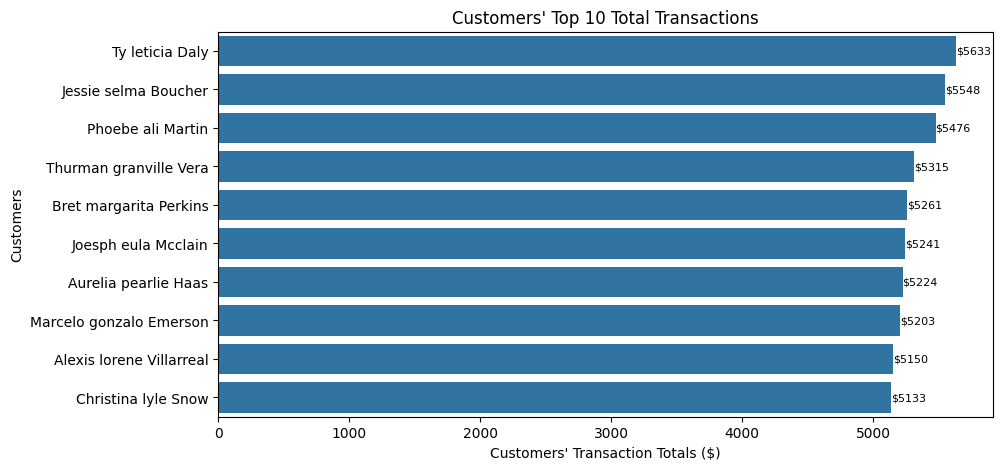

In [4]:
# 3.3 calc and plot top 10 total transaction sums per customer based on their individual transactions

# pull relevant table or columns from mysql (ssn, full name, transaction id, transaction value)
query = """SELECT 
                cust.SSN,
                concat(cust.FIRST_NAME, ' ', cust.MIDDLE_NAME, ' ', cust.LAST_NAME) as FULL_NAME, 
                cc.TRANSACTION_ID,
                cc.TRANSACTION_VALUE
            FROM cdw_sapp_customer as cust 
            INNER JOIN cdw_sapp_credit_card as cc on cust.SSN=cc.CUST_SSN;"""
cust_transactions_df = df_from_sql_query(query, 'creditcard_capstone', cred)
display(cust_transactions_df.head())

# total transaction sum per customer
cust_total_transactions = cust_transactions_df.groupby(['SSN', 'FULL_NAME'], as_index=False).agg(count=('TRANSACTION_ID','size'), total_transaction_value=('TRANSACTION_VALUE','sum')).sort_values(by=['total_transaction_value'], ascending=False)
display(cust_total_transactions.head(10))

# plot
plt.figure(figsize=(10,5))
ax = sns.barplot(cust_total_transactions.head(10), x='total_transaction_value', y='FULL_NAME', orient='h')
ax.bar_label(ax.containers[0], fontsize=8, fmt='$%.0f')
ax.set(ylabel="Customers", xlabel="Customers' Transaction Totals ($)", title="Customers' Top 10 Total Transactions")
plt.show()